<a href="https://colab.research.google.com/github/aasthadawar02/TME_6015/blob/main/Assignment2_Kaggle_Dataset_Mobile_V2_vs_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import PIL.Image as Image
import tensorflow_datasets as tfds
import pandas as pd

In [2]:
import tensorflow as tf
import numpy as np
import os
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.metrics import accuracy_score

In [3]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
train_directory="/content/drive/MyDrive/TME_6015/Assignment_2/Big_Cats_Kaggle/train"

train_data = tf.keras.utils.image_dataset_from_directory(train_directory,
                                                         validation_split=None,
                                                         image_size=(128, 128),
                                                         batch_size=16)

Found 2339 files belonging to 10 classes.


In [5]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [6]:
validation_directory="/content/drive/MyDrive/TME_6015/Assignment_2/Big_Cats_Kaggle/valid"
validation_data = tf.keras.utils.image_dataset_from_directory(validation_directory,
                                                         validation_split=None,
                                                         image_size=(128, 128),
                                                         batch_size=16)

Found 50 files belonging to 10 classes.


In [7]:
validation_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
test_directory="/content/drive/MyDrive/TME_6015/Assignment_2/Big_Cats_Kaggle/test"
test_data = tf.keras.utils.image_dataset_from_directory(test_directory,
                                                         validation_split=None,
                                                         image_size=(128, 128),
                                                         batch_size=16)

Found 50 files belonging to 10 classes.


In [9]:
test_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

**Model 1 - Mobilenet V2**

In [11]:
model_handle = "https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2"

feature_extractor = hub.KerasLayer(model_handle,
                                   trainable=True)
num_class = 10
model = tf.keras.Sequential(
    [
        normalization_layer,
        feature_extractor,
        tf.keras.layers.Dense(num_class, activation="softmax")
    ]
)
model.build([None, 128, 128, 3])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1001)              1692489   
                                                                 
 dense (Dense)               (None, 10)                10020     
                                                                 
Total params: 1702509 (6.49 MB)
Trainable params: 1688429 (6.44 MB)
Non-trainable params: 14080 (55.00 KB)
_________________________________________________________________


In [13]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [14]:
EPOCHS = 25
history = model.fit(train_data,
                    epochs=EPOCHS,
                    validation_data=validation_data)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


147/147 [==============================] - 734s 5s/step - loss: 2.1701 - accuracy: 0.5938 - val_loss: 5.4161 - val_accuracy: 0.4800
Epoch 2/25
147/147 [==============================] - 63s 429ms/step - loss: 0.8616 - accuracy: 0.7636 - val_loss: 2.3157 - val_accuracy: 0.6600
Epoch 3/25
147/147 [==============================] - 63s 428ms/step - loss: 0.6251 - accuracy: 0.8277 - val_loss: 0.3504 - val_accuracy: 0.9400
Epoch 4/25
147/147 [==============================] - 63s 425ms/step - loss: 0.4689 - accuracy: 0.8743 - val_loss: 0.4615 - val_accuracy: 0.8600
Epoch 5/25
147/147 [==============================] - 63s 427ms/step - loss: 0.4567 - accuracy: 0.8820 - val_loss: 0.8712 - val_accuracy: 0.7800
Epoch 6/25
147/147 [==============================] - 63s 430ms/step - loss: 0.4234 - accuracy: 0.8871 - val_loss: 0.5433 - val_accuracy: 0.8200
Epoch 7/25
147/147 [==============================] - 63s 430ms/step - loss: 0.3407 - accuracy: 0.9175 - val_loss: 0.6589 - val_accuracy: 0.840

4/4 [==============================] - 0s 48ms/step - loss: 1.0080 - accuracy: 0.8000


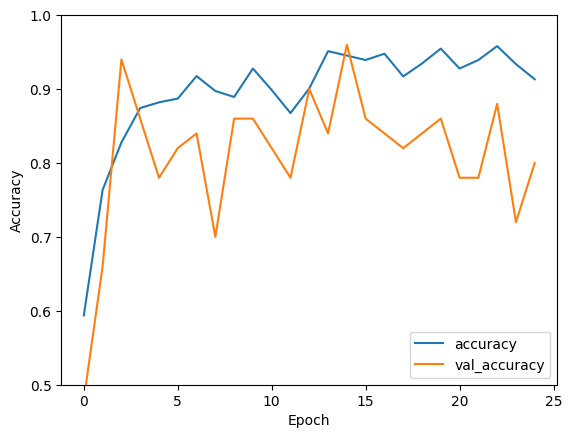

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(validation_data)

In [16]:
print(test_acc)

0.800000011920929


In [17]:
images=[]
labels=[]
for image, label in test_data:
  images.extend(image.numpy())
  labels.extend(label.numpy())
predicted_labels = model.predict(np.array(images))
predicted_labels = list(map(lambda val : np.argmax(val), predicted_labels))
len(predicted_labels)

2/2 [==============================] - 1s 66ms/step


50

In [18]:
model_1_Acc=accuracy_score(predicted_labels,labels)*100
accuracy_score(predicted_labels,labels)*100

84.0

In [19]:
len(predicted_labels)

50

In [20]:
num_classes =train_data.class_names

**few examples of the predicted output**

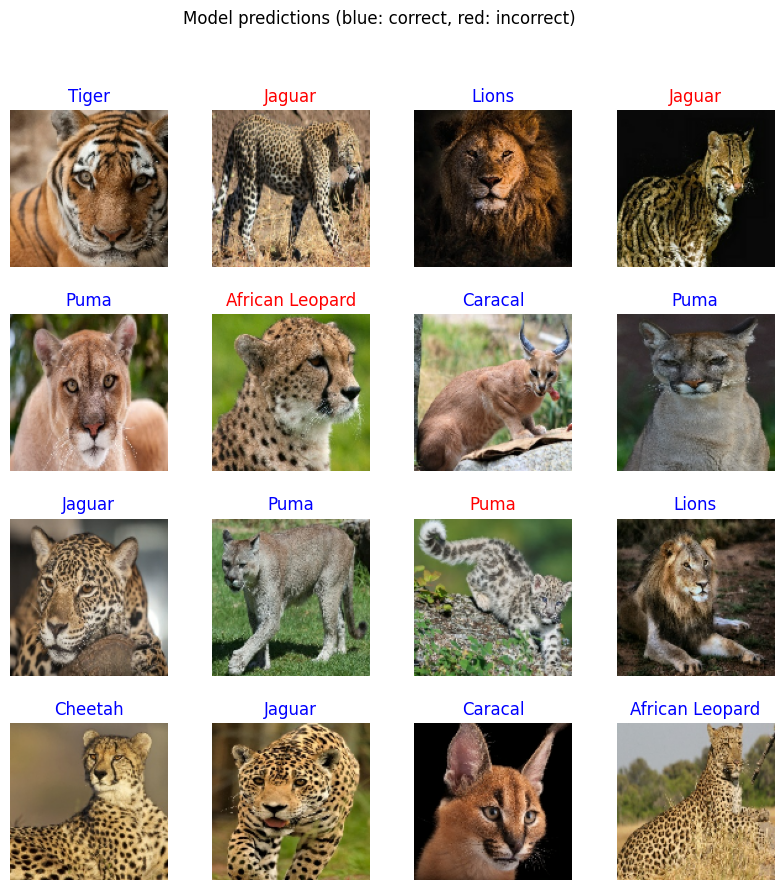

In [21]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.subplots_adjust(hspace = 0.3)
    plt.imshow(images[i].astype("uint8"))
    color = "blue" if predicted_labels[i] == labels[i] else "red"
    plt.title(num_classes[predicted_labels[i]].title(), color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

In [22]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report

**Result of model 1 - mobilenet V2**

In [23]:
print(classification_report(labels,predicted_labels))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.83      1.00      0.91         5
           2       1.00      0.60      0.75         5
           3       1.00      1.00      1.00         5
           4       0.62      1.00      0.77         5
           5       1.00      1.00      1.00         5
           6       0.75      0.60      0.67         5
           7       0.83      1.00      0.91         5
           8       1.00      0.80      0.89         5
           9       1.00      0.80      0.89         5

    accuracy                           0.84        50
   macro avg       0.86      0.84      0.84        50
weighted avg       0.86      0.84      0.84        50



**results of the prediction results using a confusion matrix**

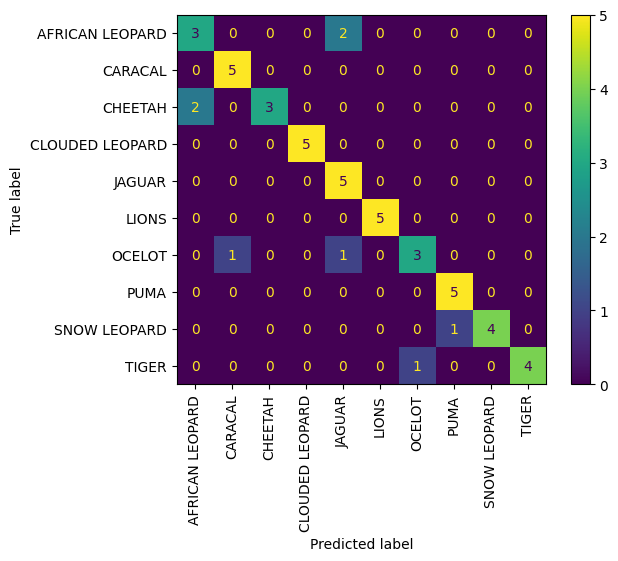

In [24]:
ConfusionMatrixDisplay.from_predictions(labels, predicted_labels, display_labels=num_classes, xticks_rotation="vertical")
plt.show()

In [25]:
train_directory="/content/drive/MyDrive/TME_6015/Assignment_2/Big_Cats_Kaggle/train"

train_data = tf.keras.utils.image_dataset_from_directory(train_directory,
                                                         validation_split=None,
                                                         image_size=(224, 224),
                                                         batch_size=16)

Found 2339 files belonging to 10 classes.


In [26]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
validation_directory="/content/drive/MyDrive/TME_6015/Assignment_2/Big_Cats_Kaggle/valid"
validation_data = tf.keras.utils.image_dataset_from_directory(validation_directory,
                                                         validation_split=None,
                                                         image_size=(224, 224),
                                                         batch_size=16)

Found 50 files belonging to 10 classes.


In [28]:
validation_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [29]:
test_directory="/content/drive/MyDrive/TME_6015/Assignment_2/Big_Cats_Kaggle/test"
test_data = tf.keras.utils.image_dataset_from_directory(test_directory,
                                                         validation_split=None,
                                                         image_size=(224, 224),
                                                         batch_size=16)

Found 50 files belonging to 10 classes.


In [30]:
test_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [31]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

**Model 2 - Mobilenet V3**

In [32]:
model_handle = "https://www.kaggle.com/models/google/mobilenet-v3/frameworks/TensorFlow2/variations/large-075-224-classification/versions/1"


num_class = 10
model = tf.keras.Sequential(
    [
        normalization_layer,
        hub.KerasLayer(model_handle,
                                   trainable=True),
        tf.keras.layers.Dense(num_class, activation="softmax")
    ]
)
model.build([None, 224, 224, 3])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 keras_layer_1 (KerasLayer)  (None, 1001)              4013897   
                                                                 
 dense_1 (Dense)             (None, 10)                10020     
                                                                 
Total params: 4023917 (15.35 MB)
Trainable params: 4004829 (15.28 MB)
Non-trainable params: 19088 (74.56 KB)
_________________________________________________________________


In [34]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [35]:
EPOCHS = 20
history = model.fit(train_data,
                    epochs=EPOCHS,
                    validation_data=validation_data)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


147/147 [==============================] - 301s 2s/step - loss: 1.7760 - accuracy: 0.7674 - val_loss: 1.3527 - val_accuracy: 0.8600
Epoch 2/20
147/147 [==============================] - 292s 2s/step - loss: 1.1296 - accuracy: 0.9000 - val_loss: 1.1180 - val_accuracy: 0.9400
Epoch 3/20
147/147 [==============================] - 260s 2s/step - loss: 1.0601 - accuracy: 0.9222 - val_loss: 1.2386 - val_accuracy: 0.9000
Epoch 4/20
147/147 [==============================] - 258s 2s/step - loss: 0.9652 - accuracy: 0.9478 - val_loss: 0.9019 - val_accuracy: 0.9200
Epoch 5/20
147/147 [==============================] - 263s 2s/step - loss: 0.9461 - accuracy: 0.9538 - val_loss: 1.2013 - val_accuracy: 0.9000
Epoch 6/20
147/147 [==============================] - 260s 2s/step - loss: 1.0263 - accuracy: 0.9440 - val_loss: 1.1657 - val_accuracy: 0.9400
Epoch 7/20
147/147 [==============================] - 260s 2s/step - loss: 0.9010 - accuracy: 0.9645 - val_loss: 1.0561 - val_accuracy: 0.9000
Epoch 8/20

4/4 [==============================] - 1s 204ms/step - loss: 0.9917 - accuracy: 0.9400


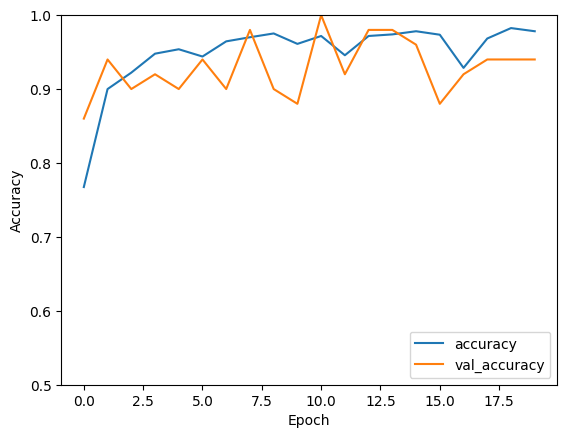

In [36]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(validation_data)

In [37]:
print(test_acc)

0.9399999976158142


In [38]:
images=[]
labels=[]
for image, label in test_data:
  images.extend(image.numpy())
  labels.extend(label.numpy())
predicted_labels = model.predict(np.array(images))
predicted_labels = list(map(lambda val : np.argmax(val), predicted_labels))
len(predicted_labels)

2/2 [==============================] - 2s 340ms/step


50

In [39]:
len(predicted_labels)

50

In [40]:
model_2_Acc = accuracy_score(predicted_labels, labels) * 100
accuracy_score(predicted_labels, labels) * 100

94.0

In [41]:
num_classes =train_data.class_names

**few examples of the predicted output**

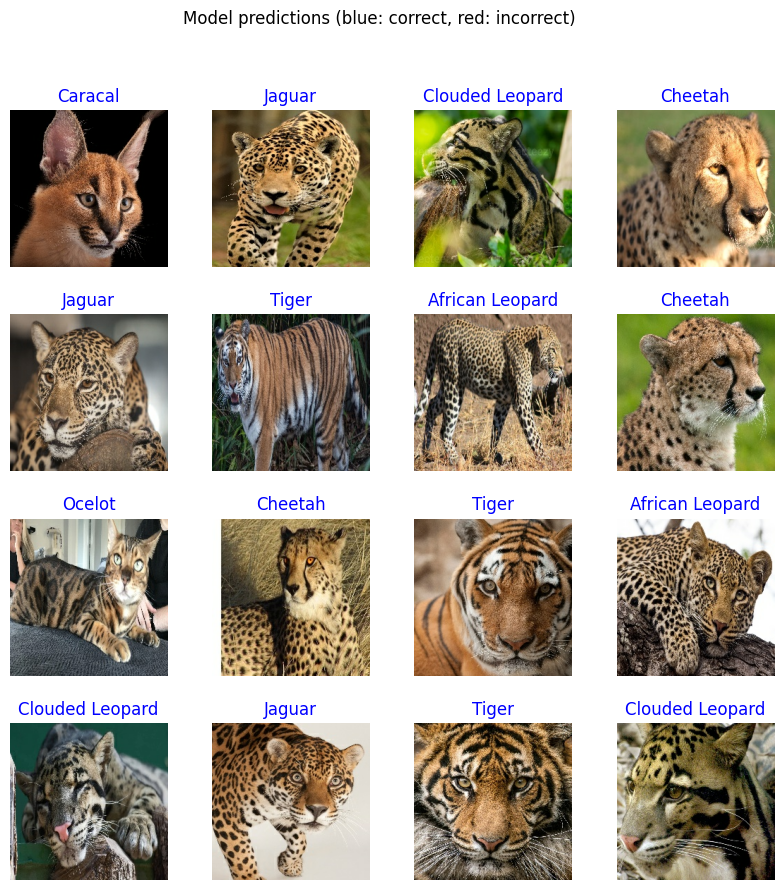

In [42]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.subplots_adjust(hspace = 0.3)
    plt.imshow(images[i].astype("uint8"))
    color = "blue" if predicted_labels[i] == labels[i] else "red"
    plt.title(num_classes[predicted_labels[i]].title(), color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

In [43]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report

**Result of Model 2 - Mobilenet V3**

In [44]:
print(classification_report(labels,predicted_labels))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      0.80      0.89         5
           5       1.00      0.60      0.75         5
           6       1.00      1.00      1.00         5
           7       0.71      1.00      0.83         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5

    accuracy                           0.94        50
   macro avg       0.95      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



**results of the prediction results using a confusion matrix**

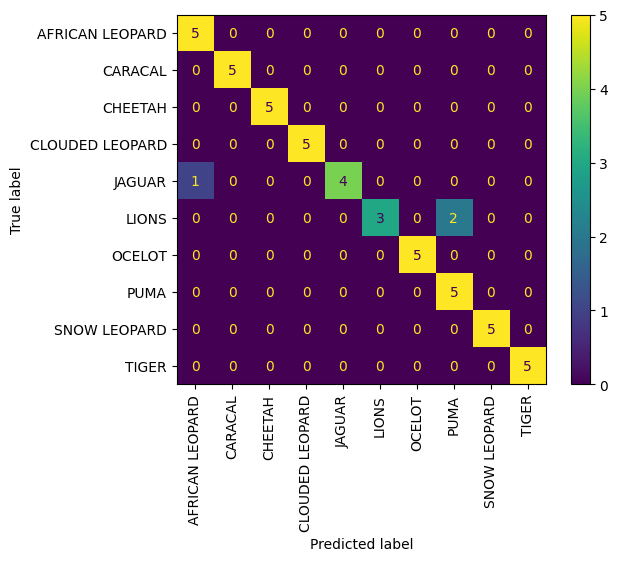

In [45]:
ConfusionMatrixDisplay.from_predictions(labels, predicted_labels, display_labels=num_classes, xticks_rotation="vertical")
plt.show()

In [46]:
print(f"Model 1 Acc : {model_1_Acc}, Model 2 Acc : {model_2_Acc}")

Model 1 Acc : 84.0, Model 2 Acc : 94.0
